In [4]:
#import the necessary libraries
import copy
import queue as Q

In [26]:
#import maps
from google.colab import files
uploaded = files.upload()

Saving map01.txt to map01.txt
Saving map02.txt to map02.txt
Saving map03.txt to map03.txt
Saving map04.txt to map04.txt
Saving map05.txt to map05.txt
Saving map06.txt to map06.txt
Saving map07.txt to map07.txt
Saving map08.txt to map08.txt
Saving map09.txt to map09.txt
Saving map10.txt to map10.txt
Saving map11.txt to map11.txt
Saving map12.txt to map12.txt
Saving map13.txt to map13.txt
Saving map14.txt to map14.txt
Saving map15.txt to map15.txt
Saving map16.txt to map16.txt
Saving map17.txt to map17.txt
Saving map18.txt to map18.txt
Saving map19.txt to map19.txt
Saving map20.txt to map20.txt
Saving map21.txt to map21.txt
Saving map22.txt to map22.txt
Saving map23.txt to map23.txt
Saving map24.txt to map24.txt
Saving map25.txt to map25.txt
Saving map26.txt to map26.txt
Saving map27.txt to map27.txt
Saving map28.txt to map28.txt
Saving map29.txt to map29.txt
Saving map30.txt to map30.txt
Saving map31.txt to map31.txt
Saving map32.txt to map32.txt
Saving map33.txt to map33.txt


In [27]:
#read map text file and return board layout, starting position, and switches and bridges if any
def readMap(fileMap):
    with open(fileMap) as f:
        MAP_ROW, MAP_COL, xStart, yStart = [int(x) for x in next(f).split()] #read first line which determines the map row and columns and block starting position
        sourceMap = []
        countMapLine = 1
        for line in f: # read map layout
            countMapLine += 1
            sourceMap.append([int(x) for x in line.split()])#create map layout
            if countMapLine > MAP_ROW: break

        #switches and bridges
        manaBoa = []
        for line in f: #read and create switches and bridges
            # 2 2 4 4 4 5
            manaBoa.append([int(x) for x in line.split()])
    return MAP_ROW, MAP_COL, xStart, yStart, sourceMap, manaBoa

In [7]:
#block class
class Block:
    def __init__(self, x, y, rot, direction, parent, board, x1=None,y1=None):
        self.x      = x
        self.y      = y
        self.rot    = rot
        self.direction    = direction
        self.parent = parent
        self.board  = copy.deepcopy(board)
        self.x1     = x1
        self.y1     = y1

    def __lt__(self, block):
        return True
    def __gt__(self, block):
        return True

#move block up function
    def move_up(self):
        newBlock = Block(self.x, self.y, self.rot, self.direction, self, self.board)
        newBlock.direction = "up"
        if self.rot == "STANDING":
            newBlock.y -= 2
            newBlock.rot = "LAYING_Y"

        elif newBlock.rot == "LAYING_X":
            newBlock.y -= 1

        elif newBlock.rot == "LAYING_Y":
            newBlock.y -= 1
            newBlock.rot = "STANDING"

        return newBlock

#move block down function
    def move_down(self):
        newBlock = Block(self.x, self.y, self.rot, self.direction, self, self.board)
        newBlock.direction = "down"
        if newBlock.rot == "STANDING":
            newBlock.y += 1
            newBlock.rot = "LAYING_Y"

        elif newBlock.rot == "LAYING_X":
            newBlock.y += 1

        elif newBlock.rot == "LAYING_Y":
            newBlock.y += 2
            newBlock.rot = "STANDING"

        return newBlock

#move block right function
    def move_right(self):
        newBlock = Block(self.x, self.y, self.rot, self.direction, self, self.board)
        newBlock.direction = "right"
        if newBlock.rot == "STANDING":
            newBlock.x += 1
            newBlock.rot = "LAYING_X"

        elif newBlock.rot == "LAYING_X":
            newBlock.x += 2
            newBlock.rot = "STANDING"

        elif newBlock.rot == "LAYING_Y":
             newBlock.x += 1

        return newBlock

#move block left function
    def move_left(self):
        newBlock = Block(self.x, self.y, self.rot, self.direction, self, self.board)
        newBlock.direction = "left"
        if newBlock.rot == "STANDING":
            newBlock.rot = "LAYING_X"
            newBlock.x -= 2

        elif newBlock.rot == "LAYING_X":
            newBlock.x -= 1
            newBlock.rot = "STANDING"

        elif newBlock.rot == "LAYING_Y":
            newBlock.x -= 1

        return newBlock

    #FUNCTIONS FOR WHEN THE 2x2 BLOCK IS SPLIT INTO 2 1x1 BLOCK
#move split block1 up
    def split_move_up(self):
        newBlock = Block(self.x, self.y, self.rot, self.direction, self, self.board, self.x1, self.y1)
        newBlock.y -= 1
        newBlock.direction = "up - split block1"
        return newBlock

#move split block1 down
    def split_move_down(self):
        newBlock = Block(self.x, self.y, self.rot, self.direction, self, self.board, self.x1, self.y1)
        newBlock.y += 1
        newBlock.direction = "down - split block1"
        return newBlock

#move split block1 left
    def split_move_left(self):
        newBlock = Block(self.x, self.y, self.rot, self.direction, self, self.board, self.x1, self.y1)
        newBlock.x -= 1
        newBlock.direction = "left - split block1"
        return newBlock

#move split block1 right
    def split_move_right(self):
        newBlock = Block(self.x, self.y, self.rot, self.direction, self, self.board, self.x1, self.y1)
        newBlock.x += 1
        newBlock.direction = "right - split block1"
        return newBlock

#move split block2 up
    def split1_move_up(self):
        newBlock = Block(self.x, self.y, self.rot, self.direction, self, self.board, self.x1, self.y1)
        newBlock.y1 -= 1
        newBlock.direction = "up - split block2"
        return newBlock

#move split block2 down
    def split1_move_down(self):
        newBlock = Block(self.x, self.y, self.rot, self.direction, self, self.board, self.x1, self.y1)
        newBlock.y1 += 1
        newBlock.direction = "down - split block2"
        return newBlock

#move split block2 left
    def split1_move_left(self):
        newBlock = Block(self.x, self.y, self.rot, self.direction, self, self.board, self.x1, self.y1)
        newBlock.x1 -= 1
        newBlock.direction = "left - split block2"
        return newBlock

#move split block2 right
    def split1_move_right(self):
        newBlock = Block(self.x, self.y, self.rot, self.direction, self, self.board, self.x1, self.y1)
        newBlock.x1 += 1
        newBlock.direction = "right - split block2"
        return newBlock

  #DISPLAY FUNCTIONS
#display block position
    def disPlayPosition(self):
        if self.rot != "SPLIT":
            print(self.rot, self.x, self.y)
        else:
            print(self.rot, self.x, self.y, self.x1, self.y1)

#display block and board
    def disPlayBoard(self):
        # local definition
        x   = self.x
        y   = self.y
        x1  = self.x1
        y1  = self.y1
        rot = self.rot
        direction = self.direction
        board = self.board
        # print board
        if rot != "SPLIT":
            for i in range(len(board)): # for ROW
                print("",end='  ')
                for j in range(len(board[i])): # for COL in a ROW
                    if (i==y and j==x and rot=="STANDING") or \
                            ((i==y and j==x) or (i==y and j==x+1) and rot=="LAYING_X") or \
                            ((i==y and j==x) or (i==y+1 and j==x) and rot=="LAYING_Y"):
                        print("x",end=' ')

                    elif(board[i][j]==0):
                        print(" ",end=' ')

                    else:
                        print(board[i][j], end=' ')

                print("")

        else: # CASE SPLIT
            for i in range(len(board)): # for ROW
                print("",end='  ')
                for j in range(len(board[i])): # for COL
                    if (i==y and j==x) or (i==y1 and j==x1):
                        print("x",end=' ')

                    elif(board[i][j]==0):
                        print(" ",end=' ')

                    else:
                        print(board[i][j], end=' ')

                print("")

In [8]:
#BLOCK FUNCTIONALITY
#cases for when the block touches switches and bridges
def isValidBlock(block):
    if isFloor(block):
        # local definition
        x     = block.x
        y     = block.y
        x1    = block.x1
        y1    = block.y1
        rot   = block.rot
        board = block.board

        # Case 2: orange tile scenario
        if rot == "STANDING" and board[y][x] == 2:
            return False

        # Case 3: X-shaped switch scenario
        if rot == "STANDING" and board[y][x] == 3:
            isNumberThree(block,x,y)

        # Case 4: O-shaped switch (only closes bridge) scenarios
        if board[y][x] == 4:
            isNumberFour(block,x,y)
        if rot == "LAYING_X" and board[y][x+1] == 4:
            isNumberFour(block,x+1,y)
        if rot == "LAYING_Y" and board[y+1][x] == 4:
            isNumberFour(block,x,y+1)
        if rot == "SPLIT" and board[y1][x1] == 4:
            isNumberFour(block,x1,y1)

        # Case 5: O-shaped switch (open and close bridge) scenarios
        if board[y][x] == 5:
            isNumberFive(block,x,y)
        if rot == "LAYING_X" and board[y][x+1] == 5:
            isNumberFive(block,x+1,y)
        if rot == "LAYING_Y" and board[y+1][x] == 5:
            isNumberFive(block,x,y+1)
        if rot == "SPLIT" and board[y1][x1] == 5:
            isNumberFive(block,x1,y1)

        # Case 6: O-shaped switch (only open bridge) scenarios
        if board[y][x] == 6:
            isNumberSix(block,x,y)
        if rot == "LAYING_X" and board[y][x+1] == 6:
            isNumberSix(block,x+1,y)
        if rot == "LAYING_Y" and board[y+1][x] == 6:
            isNumberSix(block,x,y+1)
        if rot == "SPLIT" and board[y1][x1] == 6:
            isNumberSix(block,x1,y1)

        # Case 7: ()-shaped switch (teleport and split block) scenarios
        if rot == "STANDING" and board[y][x] == 7:
            isNumberSeven(block,x,y)
        # Case7_1: MERGE BLOCK
        if rot == "SPLIT": # check IS_MERGE
            # case LAYING_X: x first
            if y == y1 and x == x1 -1:
                block.rot = "LAYING_X"

            # case LAYING_X: x1 first
            if y == y1 and x == x1 + 1:
                block.rot = "LAYING_X"
                block.x   = x1

            # case LAYING_Y: y first
            if x == x1 and y == y1 - 1:
                block.rot = "LAYING_Y"

            # case LAYING_Y: y1 first
            if x == x1 and y == y1 + 1:
                block.rot = "LAYING_Y"
                block.y   = y1

        # Case 8: X-shaped switch (only open bridge) scenario
        if rot == "STANDING" and board[y][x] == 8:
            isNumberEight(block,x,y)
        return True
    else:
        return False

In [9]:
#MORE BLOCK FUNCTIONALITY
#is block standing/laying on board
def isFloor(block):
    x = block.x
    y = block.y
    rot = block.rot
    board = block.board
    if x >= 0 and y >= 0 and \
            y < MAP_ROW and x < MAP_COL and \
            board[y][x] != 0:
        if rot == "STANDING":
            return True
        elif rot == "LAYING_Y":
            if y+1 < MAP_ROW and board[y+1][x] != 0 :
                return True
        elif rot == "LAYING_X":
            if x+1 < MAP_COL and board[y][x+1] != 0 :
                return True
        else: # case SPLIT
            x1 = block.x1
            y1 = block.y1
            if x1 >= 0 and y1 >= 0 and \
                y1 < MAP_ROW and x1 < MAP_COL and \
                board[y1][x1] != 0:
                return True
    else:
        return False

#is block standing on hole
def isGoal(block):
    x = block.x
    y = block.y
    rot = block.rot
    board = block.board
    if rot == "STANDING" and  \
        board[y][x] == 9:
        return True
    else:
        return False

#did block already traverse
def isVisited(block):
    if block.rot != "SPLIT":
        for item in passState:
            if item.x == block.x     and item.y == block.y and \
                item.rot == block.rot and item.board == block.board:
                return True

    else: # case SPLIT
        for item in passState:
            if item.x  == block.x     and item.y  == block.y and \
               item.x1 == block.x1    and item.y1 == block.y1 and \
                item.rot == block.rot and item.board == block.board:
                return True
    return False

#move block
def move(Stack, block, flag):
    if isValidBlock(block):
        if isVisited(block):
            return None
        Stack.append(block)
        passState.append(block)
        return True
    return False

#print successful path
def printSuccessRoad(block):
    successRoad = [block]
    direction2 = [block.direction]
    temp = block.parent
    #get successful path
    while temp != None:
        if temp.rot != "SPLIT":
            newBlock = Block(temp.x, temp.y, \
                    temp.rot, temp.direction, temp.parent, temp.board)
        else: # case SPLIT
            newBlock = Block(temp.x, temp.y, \
                    temp.rot, temp.direction, temp.parent, temp.board, temp.x1, temp.y1)

        successRoad = [newBlock] + successRoad
        direction2 = [temp.direction] + direction2
        temp = temp.parent

    #print successful path
    step = 0
    for item in successRoad[1:]:
        step += 1

    #new output:
    if program1 == True:
      print("\nSUCESSFUL PATH:")
      print(", ".join(direction2[1:]))
      print("\nCOMSUME",step,"STEP!!!!")
    else:
      sstep.append(step)

In [10]:
#functions for switches and bridges
# Case 3: X-shaped switch (open and close bridge)
def isNumberThree(block,x,y):
    board = block.board
    for item in ManaBoa:
        if (x,y) ==  (item[0], item[1]):
            # TOGGLEEEE
            numToggle = item[2]   # num toggle
            index = 2   # index to check more element
            for i in range(numToggle):    # traverse toggle array
                bX = item[2*i+3]
                bY = item[2*i+4]
                if board[bX][bY] == 0:
                    board[bX][bY] = 1
                else:
                    board[bX][bY] = 0
            index = index + 1 + 2 * numToggle

            # CLOSEEEE
            # check if "item" has more element
            if index < len(item):   # case has more
                # read num close
                numClose = item[index]
                # traverse list close if num > 0
                for i in range(numClose):
                    bX = item[index+2*i+1]
                    bY = item[index+2*i+2]
                    board[bX][bY]=0
                index = index + 1 + 2 * numClose

            # OPEENNNN
            # check if "item" has more element
            if index < len(item):   # case also has more item
                # get num open
                numOpen = item[index]
                # traverse list open if num > 0
                for i in range(numOpen):
                    bX = item[index+2*i+1]
                    bY = item[index+2*i+2]
                    board[bX][bY]=1

# Case 4: O-shaped switch (only closes bridge)
def isNumberFour(block,x,y):
    board = block.board
    #print("(x-y) = (", x,"-", y,")")
    for item in ManaBoa:
        if (x,y) ==  (item[0], item[1]):
            num = item[2]
            for i in range(num):
                bX = item[2*i+3]
                bY = item[2*i+4]
                board[bX][bY] = 0

# Case 5: O-shaped switch (open and close bridge)
def isNumberFive(block,x,y):
    board = block.board
    for item in ManaBoa:
        if (x,y) ==  (item[0], item[1]):
            # TOGGLEEEE
            numToggle = item[2]     # numtoggle
            index = 2   # index to check more element
            for i in range(numToggle):
                bX = item[2*i+3]
                bY = item[2*i+4]
                if board[bX][bY] == 0:
                    board[bX][bY] = 1
                else:
                    board[bX][bY] = 0
            index = index + 1 + 2 * numToggle

            # CLOSEEEE
            # check if "item" has more element
            if index < len(item):   # case has more
                # read num close
                numClose = item[index]
                # traverse list close if num > 0
                for i in range(numClose):
                    bX = item[index+2*i+1]
                    bY = item[index+2*i+2]
                    board[bX][bY]=0
                index = index + 1 + 2 * numClose

            # OPEENNNN
            # check if "item" has more element
            if index < len(item):   # case also has more item
                # get num open
                numOpen = item[index]
                # traverse list open if num > 0
                for i in range(numOpen):
                    bX = item[index+2*i+1]
                    bY = item[index+2*i+2]
                    board[bX][bY]=1

# Case 6: O-shaped switch (only open bridge)
def isNumberSix(block,x,y):
    board = block.board
    for item in ManaBoa:
        if (x,y) ==  (item[0], item[1]):
            num = item[2]
            for i in range(num):
                bX = item[2*i+3]
                bY = item[2*i+4]
                board[bX][bY] = 1

# Case 7: ()-shaped switch (teleport and split block)
def isNumberSeven(block,x,y):
    board = block.board
    array = []
    for item in ManaBoa:
        if (x,y) ==  (item[0], item[1]):
            num = item[2]
            # format x7 y7 2 x y x1 y1
            for i in range(num):
                bX = item[2*i+3]
                bY = item[2*i+4]
                array.append([bX,bY])

    (block.y,block.x,block.y1,block.x1) = \
            (array[0][0],array[0][1],array[1][0], array[1][1])

    block.rot = "SPLIT"

# Case 8: X-shaped switch (only open bridge)
def isNumberEight(block,x,y):
    board = block.board
    for item in ManaBoa:
        if (x,y) ==  (item[0], item[1]):
            num = item[2]
            for i in range(num):
                bX = item[2*i+3]
                bY = item[2*i+4]
                board[bX][bY] = 1

In [11]:
#THE START OF GRAPH SEARCHING ALGORITHMS
# solve using DFS
def DFS(block):
  #initialize stack and steps
    board = block.board
    Stack = []
    Stack.append(block)
    passState.append(block)
    virtualStep = 0
    successfulvirtualStep = 0
    while Stack:
        current = Stack.pop()
        successfulvirtualStep += 1
        #display every successful move made
        if program0 == True:
          print(str(successfulvirtualStep) + ":")
          current.disPlayPosition()
          current.disPlayBoard()

        if isGoal(current):
          printSuccessRoad(current)
          if program1 == True:
            print("COMSUME", virtualStep, "VIRTUAL STEP!!!!")
            print("COMSUME", successfulvirtualStep, "SUCCESSFUL VIRTUAL STEP!!!!")
            print("Solve using DFS!!!!")
            return
          elif program0 == True:
            print("\nCOMSUME", successfulvirtualStep, "SUCCESSFUL VIRTUAL STEP!!!!")
            print("Solve using DFS!!!!")
            return
          else:
            vstep2.append(virtualStep)
            svstep2.append(successfulvirtualStep)
            return

        else:
            if current.rot != "SPLIT":
                virtualStep += 4
                move(Stack,current.move_up(), "up")
                move(Stack,current.move_right(), "right")
                move(Stack,current.move_down(), "down")
                move(Stack,current.move_left(), "left")
            else:
                virtualStep += 8
                move(Stack,current.split_move_left(), "left0")
                move(Stack,current.split_move_right(), "right0")
                move(Stack,current.split_move_up(), "up0")
                move(Stack,current.split_move_down(), "down0")

                move(Stack,current.split1_move_left(), "left1")
                move(Stack,current.split1_move_right(), "right1")
                move(Stack,current.split1_move_up(), "up1")
                move(Stack,current.split1_move_down(), "down1")
    return False

In [12]:
# solve using BFS
def BFS(block):
    #initialize queue and nodes and steps
    board = block.board
    Queue = []
    Queue.append(block)
    passState.append(block)
    virtualStep = 0
    successfulvirtualStep = 0
    while Queue:
        current = Queue.pop(0)
        successfulvirtualStep += 1

        if isGoal(current):
          printSuccessRoad(current)
          if program1 == True:
            print("COMSUME", virtualStep, "VIRTUAL STEP!!!!")
            print("COMSUME", successfulvirtualStep, "SUCCESSFUL VIRTUAL STEP!!!!")
            print("Solve using BFS!!!!")
            return
          else:
            vstep.append(virtualStep)
            svstep.append(successfulvirtualStep)
            return

        if current.rot != "SPLIT":
            virtualStep += 4
            move(Queue,current.move_up(), "up")
            move(Queue,current.move_right(), "right")
            move(Queue,current.move_down(), "down")
            move(Queue,current.move_left(), "left")
        else:
            virtualStep += 8
            move(Queue,current.split_move_left(), "left0")
            move(Queue,current.split_move_right(), "right0")
            move(Queue,current.split_move_up(), "up0")
            move(Queue,current.split_move_down(), "down0")

            move(Queue,current.split1_move_left(), "left1")
            move(Queue,current.split1_move_right(), "right1")
            move(Queue,current.split1_move_up(), "up1")
            move(Queue,current.split1_move_down(), "down1")
    return False

In [13]:
#heuristic functions use for BEST FIRST SEARCH and A* SEARCH
#get euclidean distance from goal and block
def heuristicFunction(block):
    #  local definition
    x   = block.x
    y   = block.y
    x1  = block.x1
    y1  = block.y1
    rot = block.rot
    direction = block.direction
    board = block.board

    # get goal
    (xGoal, yGoal) = (0, 0)
    for yG in range(len(board)):
        for xG in range(len(board[0])):
            if board[y][x] == '9':
                (xGoal, yGoal) = (xG, yG)

    # calc distance pos-goal
    distance = 0
    if rot == "SPLIT":
        distance1 = (x-xGoal)*(x-xGoal)+(y-yGoal)*(y-yGoal)
        distance2 = (x1-xGoal)*(x1-xGoal)+(y1-yGoal)*(y1-yGoal)
        distance = (distance1+distance2)
    else:
        # (x1 - x2)^2 + (y1 - y2) ^ 2
        distance = (x-xGoal)*(x-xGoal)+(y-yGoal)*(y-yGoal)
    return int(distance)

#get manhattan distance from goal and block
def heuristicFunction2(block):
    #  local definition
    x   = block.x
    y   = block.y
    x1  = block.x1
    y1  = block.y1
    rot = block.rot
    direction = block.direction
    board = block.board
    # get goal
    (xGoal, yGoal) = (0, 0)
    for yG in range(len(board)):
        for xG in range(len(board[0])):
            if board[y][x] == '9':
                (xGoal, yGoal) = (xG, yG)
    # calc distance pos-goal
    distance = 0
    if rot == "SPLIT":
        distance1 = abs(xGoal - x) + abs(yGoal - y)
        distance2 = abs(xGoal - x1) + abs(yGoal - y1)
        distance = (distance1+distance2)
    else:
        # (x1 - x2)^2 + (y1 - y2) ^ 2
        #distance = (x-xGoal)*(x-xGoal)+(y-yGoal)*(y-yGoal)
        distance = abs(xGoal - x) + abs(yGoal - y)
    return int(distance)

#move using heuristicFunction
def moveBest(BestQueue, block, flag):
    if isValidBlock(block):
        if isVisited(block):
            return False
        heuristic = heuristicFunction(block)
        BestQueue.put((heuristic, block))
        passState.append(block)
        return True
    return False

#move using heuristicFunction2
def moveBest2(BestQueue, block, flag, g):
    if isValidBlock(block):
        if isVisited(block):
            return False
        g = g + 1
        heuristic2 = heuristicFunction2(block) + g
        BestQueue.put((heuristic2, g, block))
        passState.append(block)
        return True
    return False

In [14]:
# solve using BEST FIRST SEARCH
def BEST(block):
    # create priority queue
    BestQueue = Q.PriorityQueue()
    startHeuristic = heuristicFunction(block)

    # insert start node
    BestQueue.put((startHeuristic, block))
    passState.append(block)

    #initialize steps
    virtualStep = 0
    successfulvirtualStep = 0

    # until priority queue is empty
    while BestQueue.not_empty:
        item   = BestQueue.get()  # item = (distance, block)
        iDista = item[0]
        iBlock = item[1]
        successfulvirtualStep += 1

        # if goal
        if isGoal(iBlock):
          printSuccessRoad(iBlock)
          if program1 == True:
            print("COMSUME", virtualStep, "VIRTUAL STEP!!!!")
            print("COMSUME", successfulvirtualStep, "SUCCESSFUL VIRTUAL STEP!!!!")
            print("Solve using BEST SEARCH!!!!")
            return
          else:
            vstep3.append(virtualStep)
            svstep3.append(successfulvirtualStep)
            return

        # put all new operator to queue
        if iBlock.rot != "SPLIT":
            virtualStep += 4
            # try up
            moveBest(BestQueue, iBlock.move_up(), "up")
            moveBest(BestQueue, iBlock.move_down(), "down")
            moveBest(BestQueue, iBlock.move_right(), "right")
            moveBest(BestQueue, iBlock.move_left(), "left")
        else:
            virtualStep += 8
            moveBest(BestQueue, iBlock.split_move_left(), "left0")
            moveBest(BestQueue, iBlock.split_move_right(), "right0")
            moveBest(BestQueue, iBlock.split_move_up(), "up0")
            moveBest(BestQueue, iBlock.split_move_down(), "down0")

            moveBest(BestQueue, iBlock.split1_move_left(), "left1")
            moveBest(BestQueue, iBlock.split1_move_right(), "right1")
            moveBest(BestQueue, iBlock.split1_move_up(), "up1")
            moveBest(BestQueue, iBlock.split1_move_down(), "down1")
    return False

In [15]:
# solve using A* SEARCH
def aStar(block):
    # create priority queue
    BestQueue = Q.PriorityQueue()

    #initialize value
    startHeuristic = heuristicFunction2(block)
    g = 0

    # insert start node
    BestQueue.put((startHeuristic, g, block))
    passState.append(block)

    #initialize steps
    virtualStep = 0
    successfulvirtualStep = 0

    # until priority queue is empty
    while BestQueue.not_empty:
        item   = BestQueue.get()  # item = (f-value, g-value, block)
        iDista = item[0]
        iBlock = item[2]
        successfulvirtualStep += 1
        if program0 == True:
          print(str(successfulvirtualStep) + ":")
          iBlock.disPlayPosition()
          iBlock.disPlayBoard()

        # if goal
        if isGoal(iBlock):
          printSuccessRoad(iBlock)
          if program1 == True:
            print("COMSUME", virtualStep, "VIRTUAL STEP!!!!")
            print("COMSUME", successfulvirtualStep, "SUCCESSFUL VIRTUAL STEP!!!!")
            print("Solve using A* SEARCH!!!!")
            return
          elif program0 == True:
            print("\nCOMSUME", successfulvirtualStep, "SUCCESSFUL VIRTUAL STEP!!!!")
            print("Solve using A* SEARCH!!!!")
            return
          else:
            vstep4.append(virtualStep)
            svstep4.append(successfulvirtualStep)
            return

        # put all new operator to queue
        if iBlock.rot != "SPLIT":
            virtualStep += 4
            # try up
            moveBest2(BestQueue, iBlock.move_up(), "up", item[1])
            moveBest2(BestQueue, iBlock.move_down(), "down", item[1])
            moveBest2(BestQueue, iBlock.move_right(), "right", item[1])
            moveBest2(BestQueue, iBlock.move_left(), "left", item[1])
        else:
            virtualStep += 8
            moveBest2(BestQueue, iBlock.split_move_left(), "left0", item[1])
            moveBest2(BestQueue, iBlock.split_move_right(), "right0", item[1])
            moveBest2(BestQueue, iBlock.split_move_up(), "up0", item[1])
            moveBest2(BestQueue, iBlock.split_move_down(), "down0", item[1])

            moveBest2(BestQueue, iBlock.split1_move_left(), "left1", item[1])
            moveBest2(BestQueue, iBlock.split1_move_right(), "right1", item[1])
            moveBest2(BestQueue, iBlock.split1_move_up(), "up1", item[1])
            moveBest2(BestQueue, iBlock.split1_move_down(), "down1", item[1])
    return False

In [28]:
# START PROGRAM_1 HERE
# this program display every step that doesn't make the block fall off the map that aStar algorithm took for map 1
passState = []
sstep = []
program1 = False
program0 = True

MAP_ROW, MAP_COL, xStart, yStart, sourceMap, ManaBoa \
                        = readMap('map01.txt')#map can be change here

block = Block(xStart, yStart, "STANDING", "starting position", None, sourceMap)

print("\nStage 1:")
print("======================================")
aStar(block)


Stage 1:
1:
STANDING 2 2
  1 1 1               
  1 1 1 1 1 1         
  1 1 x 1 1 1 1 1 1   
    1 1 1 1 1 1 1 1 1 
            1 1 9 1 1 
              1 1 1   
2:
LAYING_X 0 2
  1 1 1               
  1 1 1 1 1 1         
  x x 1 1 1 1 1 1 1   
    1 1 1 1 1 1 1 1 1 
            1 1 9 1 1 
              1 1 1   
3:
LAYING_Y 2 0
  1 1 x               
  1 1 x 1 1 1         
  1 1 1 1 1 1 1 1 1   
    1 1 1 1 1 1 1 1 1 
            1 1 9 1 1 
              1 1 1   
4:
LAYING_Y 1 0
  1 x 1               
  1 x 1 1 1 1         
  1 1 1 1 1 1 1 1 1   
    1 1 1 1 1 1 1 1 1 
            1 1 9 1 1 
              1 1 1   
5:
LAYING_X 0 1
  1 1 1               
  x x 1 1 1 1         
  1 1 1 1 1 1 1 1 1   
    1 1 1 1 1 1 1 1 1 
            1 1 9 1 1 
              1 1 1   
6:
LAYING_X 0 0
  x x 1               
  1 1 1 1 1 1         
  1 1 1 1 1 1 1 1 1   
    1 1 1 1 1 1 1 1 1 
            1 1 9 1 1 
              1 1 1   
7:
LAYING_Y 0 0
  x 1 1               
  x 1 1 1 1 1         
  1 

In [30]:
# START PROGRAM_2 HERE
#this program allows one to enter in stage number and searching algorithm and it'll output the successful path / keypresses for that stage
passState = []
sstep = []
program1 = True
program0 = False

while True:
    try:
        number = int(input('Enter stage number: '))
        if number < 1 or number > 34:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print("Invalid number. The number must be in the range of 1-8. Try again.")

while True:
    try:
        global  sa
        sa = input('Enter searching algorithm: ')
        if sa != "BFS" and sa != "DFS" and sa != "BEST" and sa != "aStar":
            raise ValueError #this will send it to the print message and back to the input option
        break
        break
    except ValueError:
        print("Invalid input. Input must be either BFS, DFS, BEST, or aStar. Try again.")

MAP_ROW, MAP_COL, xStart, yStart, sourceMap, ManaBoa \
                        = readMap('map'+str(number)+'.txt')

block = Block(xStart, yStart, "STANDING", "starting position", None, sourceMap)

print("\nStage " + str(number) + ":")
print("======================================")
block.disPlayBoard()
print("======================================")
sa2 = eval(sa)
sa2(block)

Enter stage number: 33
Enter searching algorithm: DFS

Stage 33:
            1 1 5 1 1 1         
            1 1 1 1 1 1         
  1 1 1     5 1 1 5 1 1 1 1 1   
  1 x 1 1 1 1 1 1 1 5 5 1 1 5   
            1 1 5 1 1 5 1 1 1   
            1 1 1 1 1 1 5 1 1   
  1 1 1     1 1 1 1 1 1 5 1 1 1 
  1 9 1 1 1 1 5 1     1 1 1 5 3 
  1 1 1     1 1 1       1 1 1 1 
  1 1 1                   1 1 1 

SUCESSFUL PATH:
right, right, right, down, down, down, down, left, left, left

COMSUME 10 STEP!!!!
COMSUME 40 VIRTUAL STEP!!!!
COMSUME 11 SUCCESSFUL VIRTUAL STEP!!!!
Solve using DFS!!!!


In [31]:
# START PROGRAM_3 HERE
#this program solve all maps given using BFS, DFS, BEST AND A*; and output total steps it took for each of them
passState = []
vstep = []
sstep = []
svstep = []
sstep2 = []
#map = ["map8.txt"]
map = ["map1.txt","map2.txt", "map3.txt", "map4.txt", "map5.txt", "map6.txt", "map7.txt", "map8.txt"]
program1 = False
program0 = False

print("\nStages 1-8:")
print("======================================")

for item in map:
  MAP_ROW, MAP_COL, xStart, yStart, sourceMap, ManaBoa \
                        = readMap(item)

  block = Block(xStart, yStart, "STANDING", "starting position", None, sourceMap)

  BFS(block)

sstep2.append(sum(sstep))
print("BFS:")
print("COMSUME A TOTAL OF", sum(sstep), "STEP!!!!")
print("COMSUME A TOTAL OF", sum(vstep), "VIRTUAL STEP!!!!")
print("COMSUME A TOTAL OF", sum(svstep), "SUCCESSFUL VIRTUAL STEP!!!!")

passState = []
sstep = []
vstep2 = []
svstep2 = []
for item in map:
  MAP_ROW, MAP_COL, xStart, yStart, sourceMap, ManaBoa \
                        = readMap(item)

  block = Block(xStart, yStart, "STANDING", "starting position", None, sourceMap)

  DFS(block)

sstep2.append(sum(sstep))
print("\nDFS:")
print("COMSUME A TOTAL OF", sum(sstep), "STEP!!!!")
print("COMSUME A TOTAL OF", sum(vstep2), "VIRTUAL STEP!!!!")
print("COMSUME A TOTAL OF", sum(svstep2), "SUCCESSFUL VIRTUAL STEP!!!!")

passState = []
sstep = []
vstep3 = []
svstep3 = []
for item in map:
  MAP_ROW, MAP_COL, xStart, yStart, sourceMap, ManaBoa \
                        = readMap(item)

  block = Block(xStart, yStart, "STANDING", "starting position", None, sourceMap)

  BEST(block)

sstep2.append(sum(sstep))
print("\nBEST SEARCH:")
print("COMSUME A TOTAL OF", sum(sstep), "STEP!!!!")
print("COMSUME A TOTAL OF", sum(vstep3), "VIRTUAL STEP!!!!")
print("COMSUME A TOTAL OF", sum(svstep3), "SUCCESSFUL VIRTUAL STEP!!!!")

passState = []
sstep = []
vstep4 = []
svstep4 = []
for item in map:
  MAP_ROW, MAP_COL, xStart, yStart, sourceMap, ManaBoa \
                        = readMap(item)

  block = Block(xStart, yStart, "STANDING", "starting position", None, sourceMap)

  aStar(block)

sstep2.append(sum(sstep))
print("\nA* SEARCH:")
print("COMSUME A TOTAL OF", sum(sstep), "STEP!!!!")
print("COMSUME A TOTAL OF", sum(vstep4), "VIRTUAL STEP!!!!")
print("COMSUME A TOTAL OF", sum(svstep4), "SUCCESSFUL VIRTUAL STEP!!!!")


Stages 1-8:


FileNotFoundError: [Errno 2] No such file or directory: 'map1.txt'

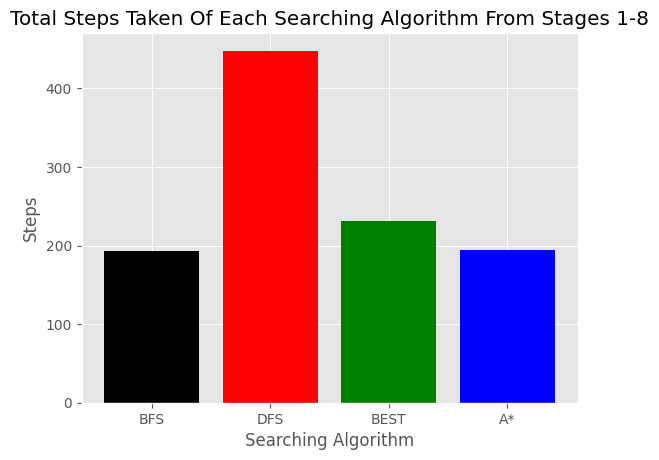

In [24]:
# graph total actual steps
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['BFS', 'DFS', 'BEST', 'A*']
energy = [sstep2[0], sstep2[1], sstep2[2], sstep2[3]]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color=['black', 'red', 'green', 'blue'])
plt.xlabel("Searching Algorithm")
plt.ylabel("Steps")
plt.title("Total Steps Taken Of Each Searching Algorithm From Stages 1-8")

plt.xticks(x_pos, x)

plt.show()

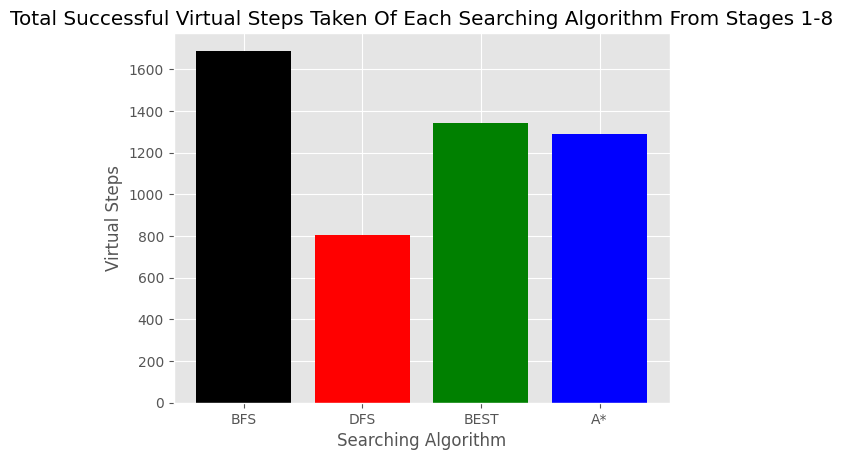

In [25]:
# graph total successful virtual steps
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['BFS', 'DFS', 'BEST', 'A*']
energy = [sum(svstep), sum(svstep2), sum(svstep3), sum(svstep4)]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color=['black', 'red', 'green', 'blue'])
plt.xlabel("Searching Algorithm")
plt.ylabel("Virtual Steps")
plt.title("Total Successful Virtual Steps Taken Of Each Searching Algorithm From Stages 1-8")

plt.xticks(x_pos, x)

plt.show()